In [16]:
import numpy as np
import vectormath as vmath

# Base 10 logarithm
def log10( x ) :
    return np.log(x)/np.log(10.)

# normalized astronomical magnitude
def magnitude( x, norm=1.) :
    return -log10(x/norm)*2.5

magnitude(100,10)


-2.5

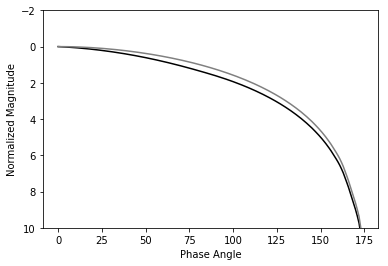

interactive(children=(FloatSlider(value=90.0, description='phase', max=180.0, step=1.0), FloatSlider(value=0.3…

In [15]:
import numpy as np
import vectormath as vmath
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

samples = 50 # of samples in both x and y 
norm = vmath.Vector3()
eye = vmath.Vector3( 0., 0., 1. )
crosseye = vmath.Vector3()
suncross = vmath.Vector3()
sun = vmath.Vector3()
planet = np.ndarray((samples,samples))
rough = 0.3


# Base 10 logarithm
def log10( x ) :
    return np.log(x)/np.log(10.)

# normalized astronomical magnitude
def magnitude( x, norm=1.) :
    return -log10(x/norm)*2.5

def brdf( costhi, costhr, cosphi, a, b):   # Bidirectional Reflectance Distribution Function
    if(cosphi>0.):
        if costhi > costhr :
            sina = np.sqrt(1.0 - costhr**2)
            tanb = np.sqrt(1.0 - costhi**2)/costhi
        else :
            sina = np.sqrt(1.0 - costhi**2)
            tanb = np.sqrt(1.0 - costhr**2)/costhr
        return costhi*(a + b*cosphi*sina*tanb)
    else:
        return costhi*a

def brightness(phase, rough = 0.3, render=True):
    bright = 0.
    sun.x = np.sin(phase*np.pi/180.) # vector pointing to sun
    sun.y = 0.
    sun.z = np.cos(phase*np.pi/180.)
    a = 1. - 0.5*(rough**2./(rough**2.+0.33)) # a,b for Oren-Nayar - constant over loop
    b = 0.45*(rough**2./(rough**2.+0.09))
    # Trace parallel rays towards a sphere
    for xsamp in range (0, samples):
        for ysamp in range (0, samples):
            norm.x = xsamp*2./(samples-1.)-1.
            norm.y =  ysamp*2./(samples-1.0)-1.
            norm.z = 0.
            mag = norm.length
            # Check if ray intersects sphere
            if mag <= 1.0:
                norm.z = np.sqrt(1.0 - mag**2.)
                costhi = norm.dot(sun)
                #calculate sun and eye vectors projected perpendicular to normal
                if  costhi >= 0.:
                    sunproj = sun - costhi*norm
                    sunproj.normalize()
                    eyeproj = eye - norm.dot(eye)*norm
                    eyeproj.normalize
                    cosphi = sunproj.dot(eyeproj)  
                    planet[ysamp][xsamp] = brdf(costhi,norm.z,cosphi,a,b)
                else:
                    planet[ysamp][xsamp] = 0.
            else:
                planet[ysamp][xsamp] = 0.
            bright += planet[ysamp][xsamp]
            
    if render:
        im = plt.imshow(planet)
        plt.show()
        
    return bright

def plotcurve(planet,col,rough) :
    phasecurve = np.ndarray(175)

    # brightness(drawphase, rough, True) #draw the sample change
    
    for phase in range (0, 175):
        phasecurve[phase] = brightness(phase, rough, False)
        if phase == 0 :
            fudge = phasecurve[phase]
        phasecurve[phase] = magnitude(phasecurve[phase],fudge)
   
    im = plt.plot(phasecurve,color=col)
    plt.ylim(10,-2)
    plt.xlabel('Phase Angle')
    plt.ylabel('Normalized Magnitude')
        
plotcurve("Mercury","black",1.0)
plotcurve("Moon","gray",0.0)
plt.show()
interact(brightness, phase=(0., 180., 1.), rough=(0., 1., 0.01));
